<a href="https://colab.research.google.com/github/umairahmed786/principal-component-analysis-with-python/blob/main/PCA_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique commonly used in data analysis and machine learning. PCA transforms the data into a new coordinate system where the greatest variances by any projection of the data come to lie on the first coordinate (called the first principal component), the second greatest variances on the second coordinate, and so on. This transformation is achieved by orthogonal linear transformations of the original data. By doing so, PCA reduces the dimensionality of the data while retaining most of the variability in the dataset.

Implementing PCA involves several steps:
1. **Standardizing the Data**: Since PCA is affected by the scale of the data, it is important to standardize the data such that each feature has a mean of 0 and a standard deviation of 1.
2. **Covariance Matrix Computation**: Calculate the covariance matrix to understand how the variables of the input data are varying from the mean with respect to each other.
3. **Eigen Decomposition**: Compute the eigenvalues and eigenvectors of the covariance matrix to identify the principal components.
4. **Feature Vector Formation**: Select the top k eigenvectors (where k is the desired number of dimensions) to form a feature vector.
5. **Recasting the Data**: Transform the original dataset using the feature vector to obtain the new k-dimensional dataset.

In this notebook, we will implement PCA manually step-by-step on an image dataset, demonstrating how each of these steps is carried out in Python.


# Importing Required Libraries

In this step, we will import all the necessary libraries that will be used throughout the implementation of PCA. We will need libraries for numerical computations, data manipulation, and visualization. Specifically, we will use:
- `numpy` for numerical operations,
- `matplotlib` and `seaborn` for data visualization,
- `sklearn` for standardizing the data.

Let's start by importing these libraries.



In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Importing the Olivetti Faces Dataset

Next, we will import the Olivetti Faces dataset. This dataset consists of 400 grayscale images of faces, with each image being 64x64 pixels. The images represent 40 different individuals, with 10 images per individual. This dataset is commonly used for testing image processing algorithms and facial recognition techniques. We will use this dataset to demonstrate the implementation of PCA, where we will reduce the dimensionality of the image data while retaining the most significant features.


In [2]:
dataset = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


# Displaying the First Image from the Olivetti Faces Dataset

To better understand the data we are working with, let's visualize the first face image from the Olivetti Faces dataset. This will give us a clear view of the original data before we apply PCA for dimensionality reduction. We'll display the image using `matplotlib`.


<Figure size 640x480 with 0 Axes>

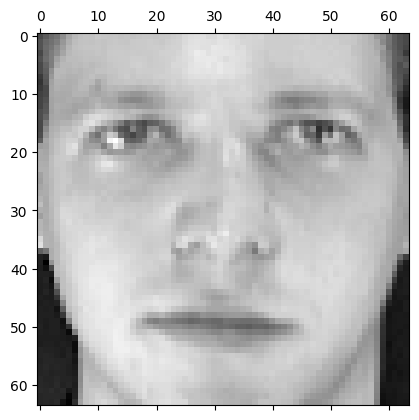

In [5]:
first_face = dataset.data[0].reshape(64,64)
plt.gray()
plt.matshow(first_face)

# Exploring the Dataset: Examples and Features

In this cell, we will explore the Olivetti Faces dataset to understand its structure. We'll display the number of examples (images) and their features (pixels). Additionally, we'll calculate and display the size of the covariance matrix, which is a crucial component in PCA. The covariance matrix helps us understand how different features (pixels) vary with respect to each other.


In [9]:
X_data = dataset.data
n_samples , n_features = X_data.shape
print(f"Number of examples (images): {n_samples}")
print(f"Number of features (pixels per image): {n_features}")

Number of examples (images): 400
Number of features (pixels per image): 4096


# Standardizing the Dataset

Before applying PCA, it is essential to standardize the dataset. Standardization ensures that each feature contributes equally to the analysis by transforming the data to have a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization.

The formula for standardizing data is:
 \[
X_n = \frac{{X_{\text{data}} - X_m}}{{X_s}}
\]

where:
- \( X_n \) is the standardized value,
- \( X_{\text{data}} \) is the original data value,
- \( X_m \) is the mean of the feature (column),
- \( X_s \) is the standard deviation of the feature (column).

By applying this formula, each data point is transformed based on the mean and standard deviation of its respective feature. This ensures that the transformed data has a mean of 0 and a standard deviation of 1, making it suitable for PCA, which is sensitive to the variances of the original variables.



In [15]:
Xm = np.mean(X_data, axis=0)
Xs = np.std(X_data, axis=0)
Xv = np.var(X_data, axis=0)

print(f'Mean befor standardization is {Xm}')
print(f"Standard deviation before standardization: {Xs}")

Xn = (X_data-Xm) / Xs  # Applying standardization


Mean befor standardization is [0.40013435 0.43423545 0.4762809  ... 0.32141536 0.3136469  0.31045464]
Standard deviation before standardization: [0.18046872 0.18926673 0.19449872 ... 0.18760698 0.18338676 0.1804086 ]


In [16]:
Xm = np.mean(Xn, axis=0)
Xs = np.std(Xn, axis=0)
Xv = np.var(Xn, axis=0)

print(f"Mean after standardization (should be close to 0): {Xm}")
print(f"Standard deviation after standardization (should be close to 1): {Xs}")

Mean after standardization (should be close to 0): [-3.0502676e-07  3.8612635e-07  5.7131052e-07 ... -4.4494868e-07
 -1.1310353e-06 -5.1595271e-07]
Standard deviation after standardization (should be close to 1): [0.9999999  1.0000002  1.0000001  ... 1.0000001  0.99999946 0.99999976]


# Calculating the Covariance Matrix

In this cell, we will calculate the covariance matrix of the standardized dataset. The covariance matrix is a square matrix that summarizes the covariance between each pair of features (columns) in the dataset. It provides crucial information about the relationships between variables and is a fundamental component in Principal Component Analysis (PCA).

Let's compute the covariance matrix for our standardized dataset using NumPy's `np.cov()` function.


In [18]:
cov = np.cov(Xn.T)

print(f"Size of the covariance matrix: {cov.shape}")

Size of the covariance matrix: (4096, 4096)


# Calculating Eigenvalues and Eigenvectors

In this cell, we will compute the eigenvalues and eigenvectors of the covariance matrix. In the context of PCA, the eigenvectors represent the directions or principal components of maximum variance in the data, while the eigenvalues indicate the magnitude of variance along these directions.

The eigenvectors are the directions along which the data varies the most, and the eigenvalues represent the amount of variance explained by each eigenvector. The principal components are ordered by the amount of variance they explain, with the first principal component explaining the most variance, followed by the second principal component, and so on.

By calculating the eigenvalues and eigenvectors of the covariance matrix, we can determine the principal components of the data, which will be used to perform dimensionality reduction via PCA.


In [39]:
eig_values, eig_vectors = np.linalg.eig(cov)

print(f'Eigenvalues are: {eig_values}')
print(f'Eigenvectors are: {eig_vectors}')

Eigenvalues are: [ 1.10361838e+03+0.00000000e+00j  5.06810771e+02+0.00000000e+00j
  3.21988946e+02+0.00000000e+00j ...  4.18688287e-16-7.28709616e-17j
 -4.78987561e-16+0.00000000e+00j -3.15752819e-16+0.00000000e+00j]
Eigenvectors are: [[ 0.00332091+0.00000000e+00j  0.02209019+0.00000000e+00j
   0.00096616+0.00000000e+00j ...  0.00040313+1.99198998e-04j
  -0.00276838+0.00000000e+00j  0.00374572+0.00000000e+00j]
 [ 0.0051638 +0.00000000e+00j  0.02419231+0.00000000e+00j
  -0.00080387+0.00000000e+00j ... -0.00021675-8.43696081e-05j
  -0.00038933+0.00000000e+00j  0.00051613+0.00000000e+00j]
 [ 0.00662312+0.00000000e+00j  0.02679893+0.00000000e+00j
  -0.00087628+0.00000000e+00j ...  0.00010935+4.72779223e-05j
  -0.00047544+0.00000000e+00j  0.00011276+0.00000000e+00j]
 ...
 [-0.00136457+0.00000000e+00j -0.02241647+0.00000000e+00j
  -0.00844198+0.00000000e+00j ... -0.00426578+8.74320843e-03j
   0.01117905+0.00000000e+00j -0.00094926+0.00000000e+00j]
 [-0.00355313+0.00000000e+00j -0.02091237+0.

# Sorting Eigenvalues and Choosing Principal Components

In this cell, we will sort the eigenvalues in descending order and select the first 100 eigenvectors corresponding to the largest eigenvalues. This step is crucial in PCA, as it allows us to retain the most significant components that explain the maximum variance in the data.

By choosing only a subset of the eigenvectors (principal components) based on their corresponding eigenvalues, we can reduce the dimensionality of the dataset while preserving most of the variability. This reduction in dimensionality simplifies subsequent analysis and visualization tasks while retaining the essential information contained in the data.

Let's proceed to sort the eigenvalues and select the first 100 eigenvectors.


In [25]:
num_component = 100

sorted_keys = np.argsort(eig_values)[::-1][:num_component]

eig_values, pc = eig_values[sorted_keys], eig_vectors[:, sorted_keys]

print(f'Now top 100 eigenvalues are: {eig_values}')
print(f'And their corresponding eigenvectors (Principal Component) are: {pc}')

Now top 100 eigenvalues are: [1103.61837729+0.j  506.81077075+0.j  321.98894616+0.j  192.52605165+0.j
  133.29820071+0.j  127.32608256+0.j   97.88654411+0.j   85.07040679+0.j
   76.28876455+0.j   67.59767237+0.j   62.99632621+0.j   55.5860037 +0.j
   50.65339271+0.j   46.97242511+0.j   44.93781646+0.j   39.34571999+0.j
   35.59951123+0.j   32.57948237+0.j   31.17925162+0.j   29.53297511+0.j
   27.66548271+0.j   26.72432935+0.j   24.4001895 +0.j   22.73980663+0.j
   22.05838703+0.j   21.06701803+0.j   20.38505338+0.j   19.42049711+0.j
   17.28771355+0.j   16.89589378+0.j   16.18486669+0.j   15.20429242+0.j
   14.96804845+0.j   13.74425096+0.j   13.49528854+0.j   13.09000679+0.j
   12.65117701+0.j   11.94077346+0.j   11.6969789 +0.j   10.99207019+0.j
   10.72117336+0.j   10.35741016+0.j   10.13508225+0.j   10.06972199+0.j
    9.56947911+0.j    9.49308729+0.j    9.14254728+0.j    9.04815485+0.j
    8.533534  +0.j    8.45599528+0.j    8.31978127+0.j    8.01234248+0.j
    7.80035289+0.j    

# Projecting Data onto Principal Components

In this step, we will project the original standardized data onto the selected principal components (eigenvectors). This process involves multiplying the standardized data matrix by the matrix of eigenvectors.

By projecting the data onto the principal components, we obtain the principal component scores (PCS), which represent the coordinates of each data point in the new lower-dimensional space defined by the principal components. These scores capture the essential information about each data point in terms of the principal components' directions.

Calculating the PCS is a crucial step in PCA, as it allows us to represent the data in a reduced-dimensional space while retaining most of its variance. This facilitates further analysis, visualization, and modeling tasks.

Let's proceed to project the data onto the principal components.


In [26]:
Z = np.dot(Xn, pc)

print(f'Dimensions of the transformed matrix is: {Z.shape}')

Dimensions of the transformed matrix is: (400, 100)


# Reconstructing the Data from Principal Components

In this cell, we will reconstruct the original data from the projected principal components. This involves taking the transpose of the PCA transformation matrix and multiplying it with the projected data matrix.

Reconstructing the data allows us to examine how well the PCA representation captures the essential information from the original dataset. It is an essential step in PCA analysis for evaluating the effectiveness of dimensionality reduction and understanding the trade-offs between reducing dimensionality and preserving information.

Let's proceed to reconstruct the data from the principal components.


In [28]:
transpose_pc = pc.T

obtained_data = np.dot(Z, transpose_pc)


# Displaying the Reconstructed First Face

In this cell, we will display the reconstructed first face from the dataset. After reconstructing the data from the principal components, we can visualize how well the PCA representation captures the essential features of the original image.

Let's proceed to display the reconstructed first face.


<ipython-input-29-25b3a41c750b>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  first_face = obtained_data[0].reshape(64,64).astype(np.float64)


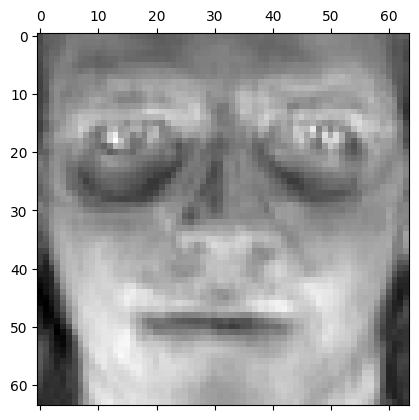

In [29]:
first_face = obtained_data[0].reshape(64,64).astype(np.float64)

plt.matshow(first_face)

# Calculating Variance Explained by Principal Components

In this final step, we will calculate the variance explained by each principal component and determine how much variance is captured by the first 100 principal components. This analysis helps us understand the extent to which the principal components represent the variability present in the original dataset.

Let's proceed to calculate the variance explained by the principal components and determine the cumulative variance captured by the first 100 principal components.


In [41]:
cumulative_variance = np.var(np.dot(Xn, eig_vectors), axis=0)

index = np.argsort(-cumulative_variance)
cumulative_variance = cumulative_variance[index]

variance_captured = np.cumsum(cumulative_variance) / np.sum(cumulative_variance)
print(f'Percentage of variance we captured in the first 100 eigen vectors is: {variance_captured[99]*100}%')

Percentage of variance we captured in the first 100 eigen vectors is: 93.56375347955003%


**Now, we can see that we have captured about 93% of face information by using just 100 principal components out of the total 4096 features.**
